In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80
sns.set()

np.random.seed(5)

In [2]:
from synthesizer import Synthesizer
from generator import Generator
from algorithm import Algorithm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
synt = Synthesizer(3)
gen = Generator(synt)
gen.generate(10, 80, 160)
T = 400
algo = Algorithm(gen, T)
algo.run()

Expert 1 learning on 31 - 71
Expert 2 learning on 155 - 195
Expert 3 learning on 264 - 304


/Users/sergeykb/2024-Project-125/mycode/algorithm.py:54: RuntimeWarning: invalid value encountered in divide
  self.normalized_weights = self.weights / self.weights[:self.launched].sum()
/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sergeykb/miniforge3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


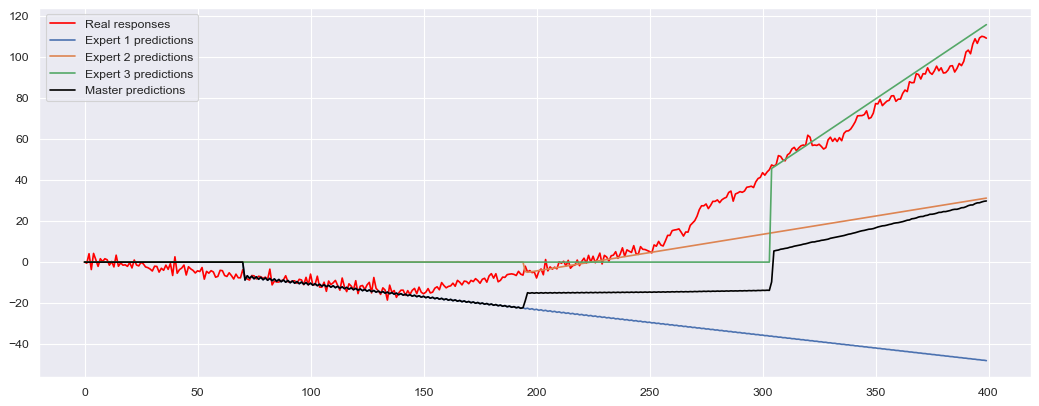

In [4]:
plt.figure(figsize=(16, 6))
plt.plot(np.arange(T), algo.responses, label="Real responses", color='red')
for i in range(3):
    plt.plot(np.arange(T), algo.experts_predictions_all.T[i], label=f"Expert {i+1} predictions")
plt.plot(np.arange(T), algo.master_predictions_all, label="Master predictions", color='black')

plt.legend()


In [5]:
algo.changes

array([ 71, 195, 304])

In [6]:
gen.stamps

array([   0,  142,  249,  359,  469,  576,  686,  796,  938, 1045, 1187])

In [7]:
algo.models

In [8]:
algo.normalized_weights

array([0.33346594, 0.32769459, 0.33883947])

In [9]:
algo.weights

array([0.93129874, 0.91548402, 0.94506032])

In [10]:
algo.experts_predictions

array([-47.94792177,  31.13839813, 115.55130848])

In [11]:
gen.stamps

array([   0,  142,  249,  359,  469,  576,  686,  796,  938, 1045, 1187])

In [12]:
gen.stamps[:-1] + np.diff(gen.stamps) // 2

array([  71,  195,  304,  414,  522,  631,  741,  867,  991, 1116])

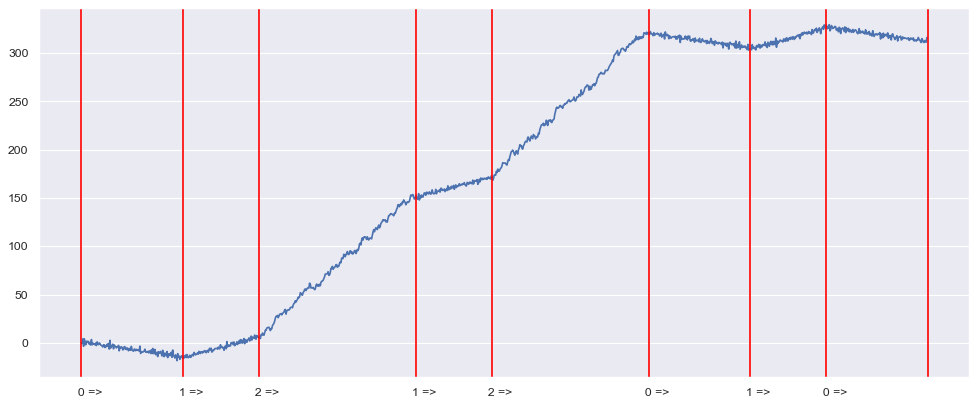

In [13]:
gen.draw_binded()